In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 8.6 MB/s 
     |████████████████████████████████| 145 kB 66.2 MB/s 
     |████████████████████████████████| 181 kB 23.9 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=98e3353afc6f4122ed0262fdf0b4001916aaedcbcf58f04dccdeea316ab9cee0
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb
import pandas as pd 
import wandb
api = wandb.Api()
from tqdm import tqdm


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
from itertools import product

In [ ]:
from google.colab import data_table

data_table.enable_dataframe_formatter()

In [ ]:
tss = pd.read_csv('/content/drive/MyDrive/DRO paper Figures notebook backup/tissueSourceSite.tsv', sep = '\t')

In [ ]:
import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.2f}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

# LUAD

## ERM

In [ ]:
# Project is specified by <entity/project-name>

# Project is specified by <entity/project-name>
sweep_runs = [list(api.sweep(f"surya-narayanan/Lung-pred_healthy/{i}").runs) for i in ['5w2lic4z']]
sweep_runs = [item for sublist in sweep_runs for item in sublist]

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])
    confidences.append(run.config['confidence_threshold'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps
    })



100%|██████████| 25/25 [00:00<00:00, 14883.97it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS']).agg(['median', 'std'])[['test_task_f1']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS test_task_f1          
                           median       std
0                  1    91.647732  5.173686
1                  2    88.365203  2.670492
2                  3    77.731138  8.694622
3                  4    79.571509  8.492250
4                  5    72.463793  3.702171

## ABSTENTION

In [ ]:
sweep_runs = [list(api.sweep(f"surya-narayanan/Lung-pred_healthy/{i}").runs) for i in ['zzyzea47', 'fjrfl7z0']]
sweep_runs = [item for sublist in sweep_runs for item in sublist]

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)
    coverages.append(run.summary._json_dict['test_num_confident'] * 100/125.503998)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])
    confidences.append(run.config['confidence_threshold'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "test_num_confident": coverages,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    "confidence_threshold": confidences
    })



100%|██████████| 100/100 [00:00<00:00, 25121.61it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS', 'confidence_threshold']).agg(['median', 'std'])[['test_task_f1', 'test_num_confident']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS confidence_threshold  ... test_num_confident           
                                            ...             median        std
0                   1                  0.6  ...          98.100463   1.642552
1                   1                  0.7  ...          94.671089   7.554772
2                   1                  0.8  ...          87.914330   9.014155
3                   1                  0.9  ...          60.594083  20.802437
4                   2                  0.6  ...          95.588989   4.062903
5                   2                  0.7  ...          90.413056   3.170638
6                   2                  0.8  ...          77.766446   9.948199
7                   2                  0.9  ...          59.172617  14.121242
8                   3                  0.6  ...          96.079807   1.781446
9                   3                  0.7  ...          87.296022   6.486719
10                  3                  0.8  ...          76.121880  11.581833
11                  3                  0.9  ...          63.819481  20.513693
12                  4                  0.6  ...          93.753190   2.920365
13                  4                  0.7  ...          81.438043   8.679248
14                  4                  0.8  ...          76.211120  19.921697
15                  4                  0.9  ...          54.525752  21.446034
16                  5                  0.6  ...          95.627232   3.453495
17                  5                  0.7  ...          90.298321  17.098106
18                  5                  0.8  ...          83.331210  28.542085
19                  5                  0.9  ...          59.338349  20.876090

[20 rows x 6 columns]

## GROUP-DRO

In [ ]:


# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/Lung-pred_healthy/9qh7r1k5")
sweep_runs = sweep.runs

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 
    
    if len(run.summary._json_dict) == 0:
      continue

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)
    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    })



100%|██████████| 25/25 [00:00<00:00, 125.82it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS']).agg(['median', 'std'])[['test_task_f1']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS test_task_f1          
                           median       std
0                  1    92.182958  8.080502
1                  2    88.580006  3.988429
2                  3    83.647621  9.844561
3                  4    88.760632  5.846768
4                  5    77.367562  5.088214

## TOTA

In [ ]:
# Project is specified by <entity/project-name>
sweep_runs = [list(api.sweep(f"surya-narayanan/Lung-pred_healthy/{i}").runs) for i in ['bpxc5zp9', 't8juq0y3', 'p1atanpm', 'woduiumw']]
sweep_runs = [list(api.sweep(f"surya-narayanan/Lung-pred_healthy/{i}").runs) for i in ['vixxjxzy', 'yjtd5r6q', '75nmh65o', '5285u5u0', 'dojwcw1f']]
# sweep_runs = [list(api.sweep(f"surya-narayanan/Lung-pred_healthy/{i}").runs) for i in ['2qnclhcp']]
sweep_runs = [item for sublist in sweep_runs for item in sublist]

summary_list, config_list, name_list = [], [], []

best_val_f1s, confidences, train_hosps, val_hosps, ss = [], [], [], [], []

for run in tqdm(sweep_runs): 
    
    if len(run.summary._json_dict) == 0:
      continue

    if run.summary._json_dict['val_av_label'] == 0 :
      continue

    # if run.config['iter'] == 7 :
    #   continue
    
    best_val_f1s.append(run.summary._json_dict['best_val_f1'] * 100)
    if 'confidence_threshold' not in run.config:
      confidences.append(0.5)
    else:
      confidences.append(run.config['confidence_threshold'])

    
    
    train_hosps.append(run.config['training_hosp'])
    val_hosps.append(run.config['val_hosp'])
    ss.append(run.config['train_s'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

tota_macro_f1_some_hosps = pd.DataFrame({
    "best_val_f1": best_val_f1s,
    'confidence_treshold' : confidences,
    "training_hosp": train_hosps,
    "val_hosp": val_hosps,
    "train_s": ss,
    })



100%|██████████| 669/669 [00:00<00:00, 16845.50it/s]


In [ ]:
tota_macro_f1_some_hosps.set_index(['train_s', 'confidence_treshold'], inplace = True)

In [ ]:
tota_macro_f1_some_hosps

best_val_f1 training_hosp val_hosp
train_s confidence_treshold                                    
4       0.9                    87.547272            38       38
        0.9                    99.041396            38       99
        0.9                    91.101307            38       50
        0.9                    51.649404            38       78
        0.9                    96.832693            38       73
...                                  ...           ...      ...
1       0.5                    87.009877            99       99
0       0.5                    84.860408            99       99
4       0.5                    82.502925            99       99
1       0.5                    68.157184            99       99
0       0.5                    66.776705            99       99

[654 rows x 3 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':


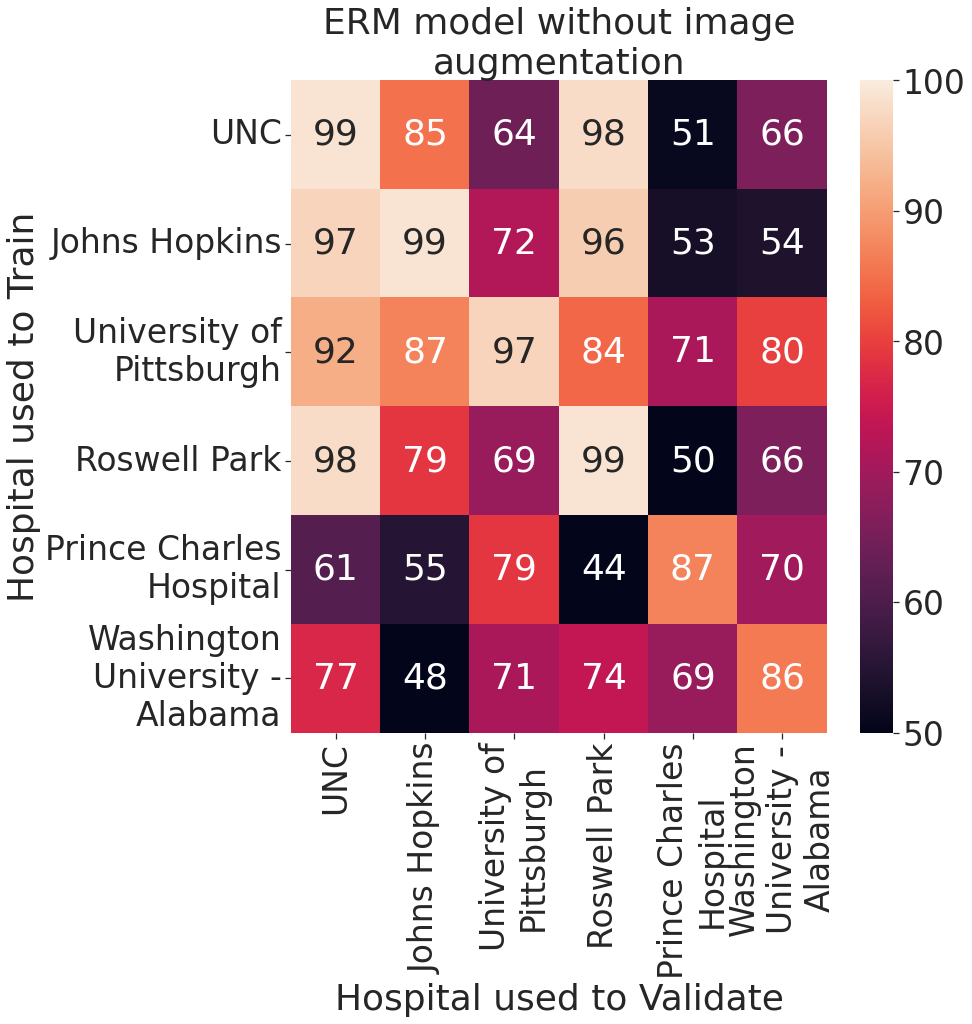

In [ ]:
sns.set(font_scale = 3, style = 'ticks')

# sps = ['x', 'slide_id', 'source_id']
imgs = ['RGB']
ss = [0]
normal_models = ['PretrainedResnet50FT_Hosp_DRO_abstain', 'PretrainedResnet50FT_Hosp_DRO_log']

num_rows = 1
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

data_0 = tota_macro_f1_some_hosps.loc[(0, 0.5)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp').astype(int)

ax = sns.heatmap(ax=axes, data = data_0, annot=True, fmt='g', vmin = 50, vmax = 100)  

for i in range(num_cols):
  axes.set_xlabel("Hospital used to Validate") 
  
  axes.set_xticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in ax.get_xticklabels()]], rotation = 90)
  
  if i == 0:
    axes.set_yticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in ax.get_yticklabels()]], rotation = 0)
    axes.set_ylabel("Hospital used to Train")    
    

axes.set_title(textwrap.fill("ERM model without image augmentation", 25))

plt.subplots_adjust(wspace = 0.05, hspace = 0)
plt.savefig('/content/drive/MyDrive/DRO paper Figures notebook backup/Figures/tota_main_0_0.5.png', bbox_inches='tight', dpi = 300)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  


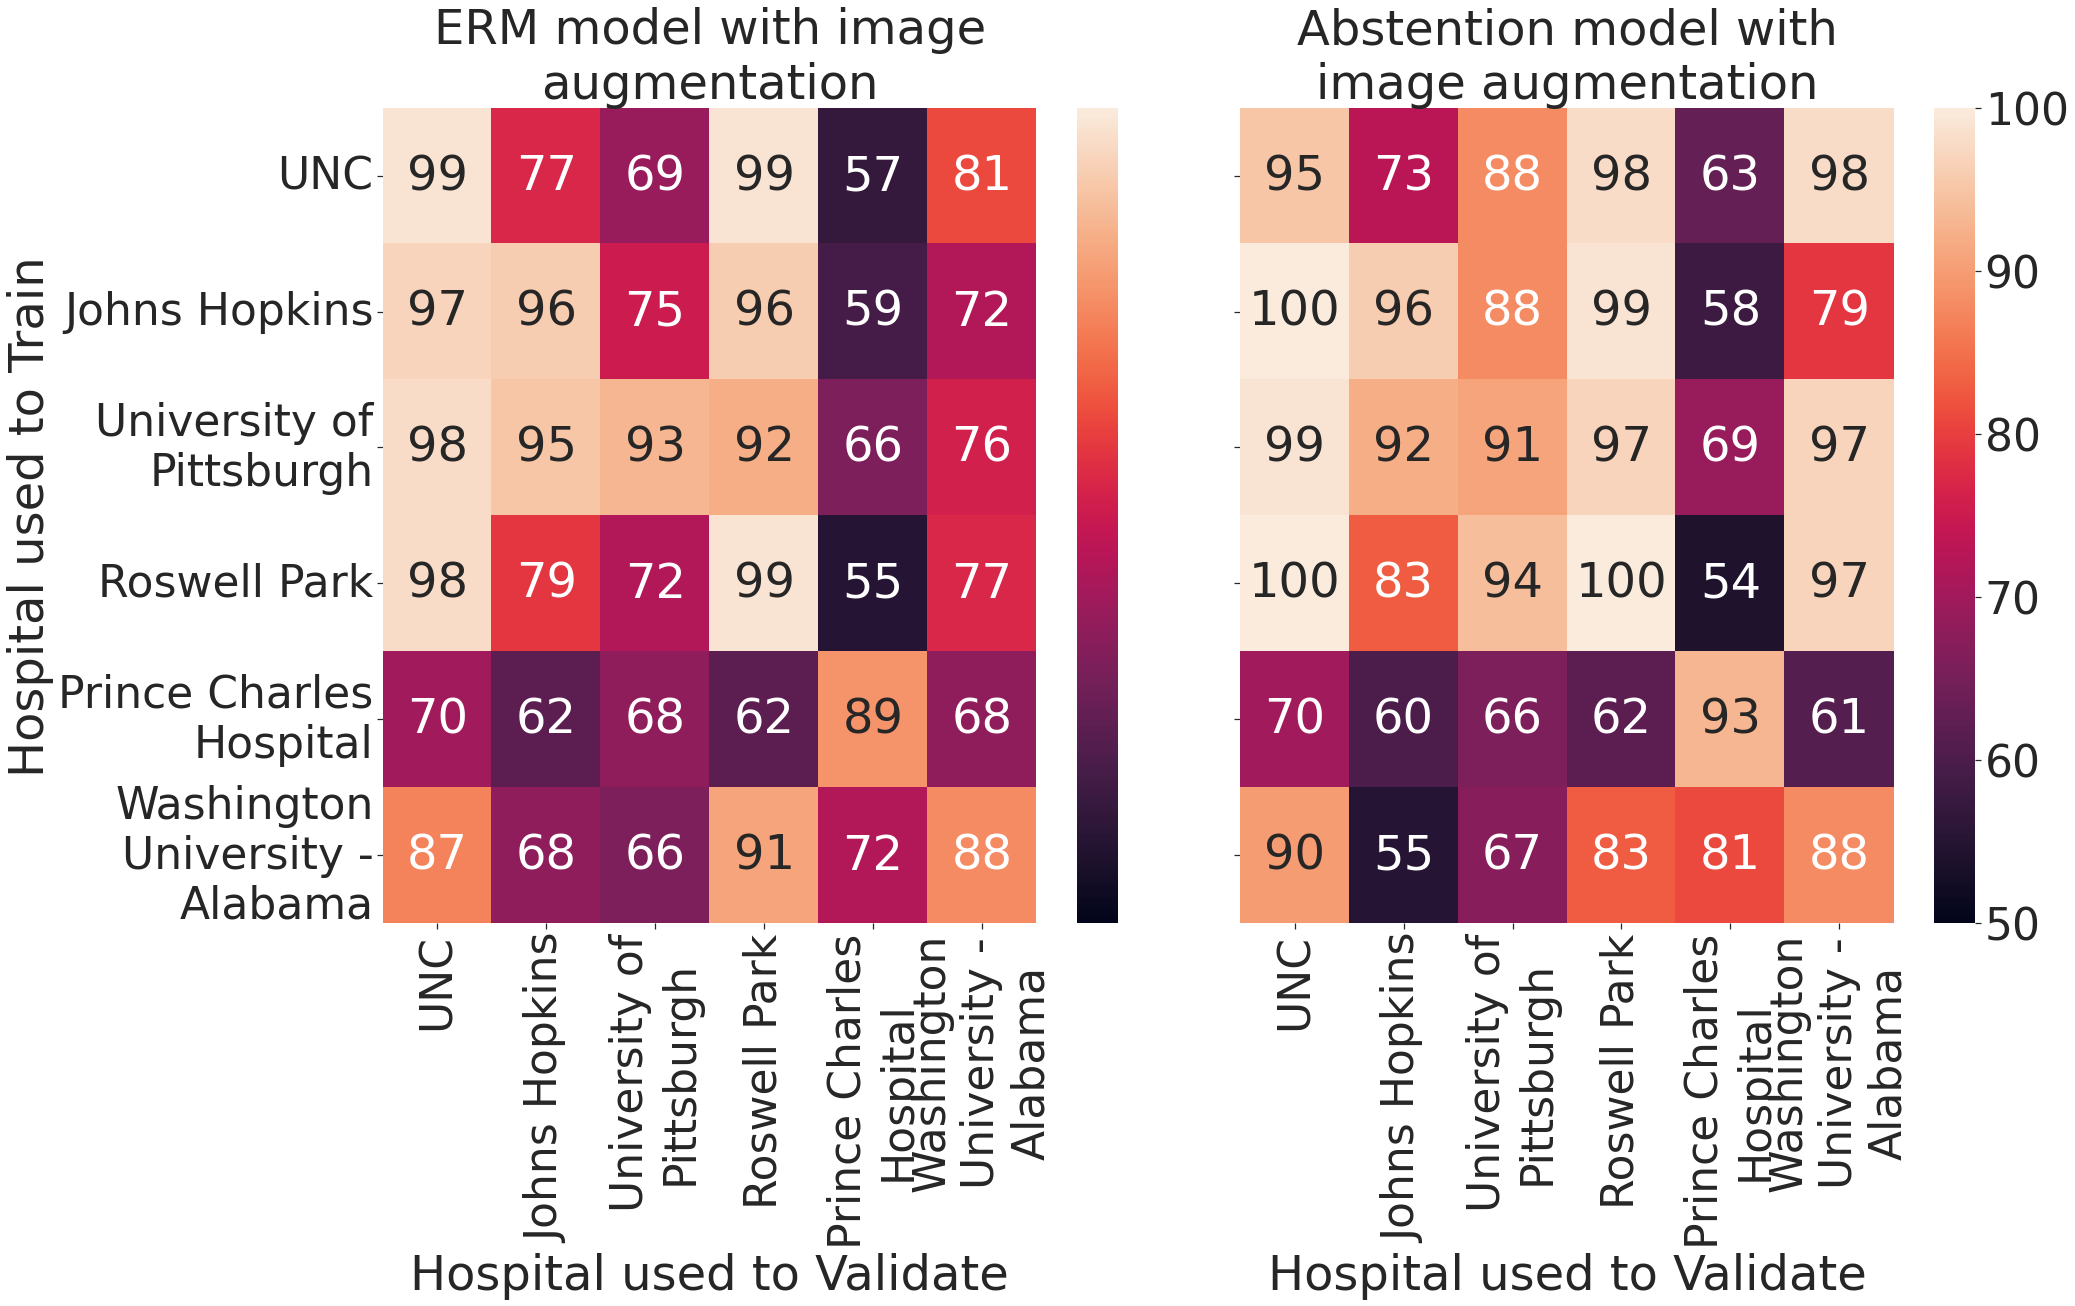

In [ ]:
sns.set(font_scale = 4, style = 'ticks')

# sps = ['x', 'slide_id', 'source_id']
imgs = ['RGB']
ss = [0]
normal_models = ['PretrainedResnet50FT_Hosp_DRO_abstain', 'PretrainedResnet50FT_Hosp_DRO_log']

num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 15))

data_augment = tota_macro_f1_some_hosps.loc[(4, 0.5)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp').astype(int)

data_abstain = tota_macro_f1_some_hosps.loc[(4, 0.9)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp').astype(int)

ax = sns.heatmap(ax=axes[0], data = round(data_augment, 2), annot=True, fmt='g', vmin = 50, vmax = 100)    
ax = sns.heatmap(ax=axes[1], data = round(data_abstain, 2), annot=True, fmt='g', vmin = 50, vmax = 100)    

import textwrap
for i in range(num_cols):
  axes[i].set_xlabel("Hospital used to Validate") 
  
  axes[i].set_xticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in ax.get_xticklabels()]], rotation = 90)
  
  if i == 0:
    axes[0].set_yticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in ax.get_yticklabels()]], rotation = 0)
    axes[0].set_ylabel("Hospital used to Train")    
    
  else:
    axes[i].set_ylabel("")
    axes[i].set_yticklabels([])
  

axes[0].set_title(textwrap.fill("ERM model with image augmentation", 25))
axes[1].set_title(textwrap.fill("Abstention model with image augmentation", 25))

c_bar = fig.axes[0].collections[0].colorbar
c_bar.set_ticks([])

plt.subplots_adjust(wspace = 0.05, hspace = 0)
plt.savefig('/content/drive/MyDrive/DRO paper Figures notebook backup/Figures/tota_main_others.png', bbox_inches='tight', dpi = 300)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.


109
109
109
109
109
109


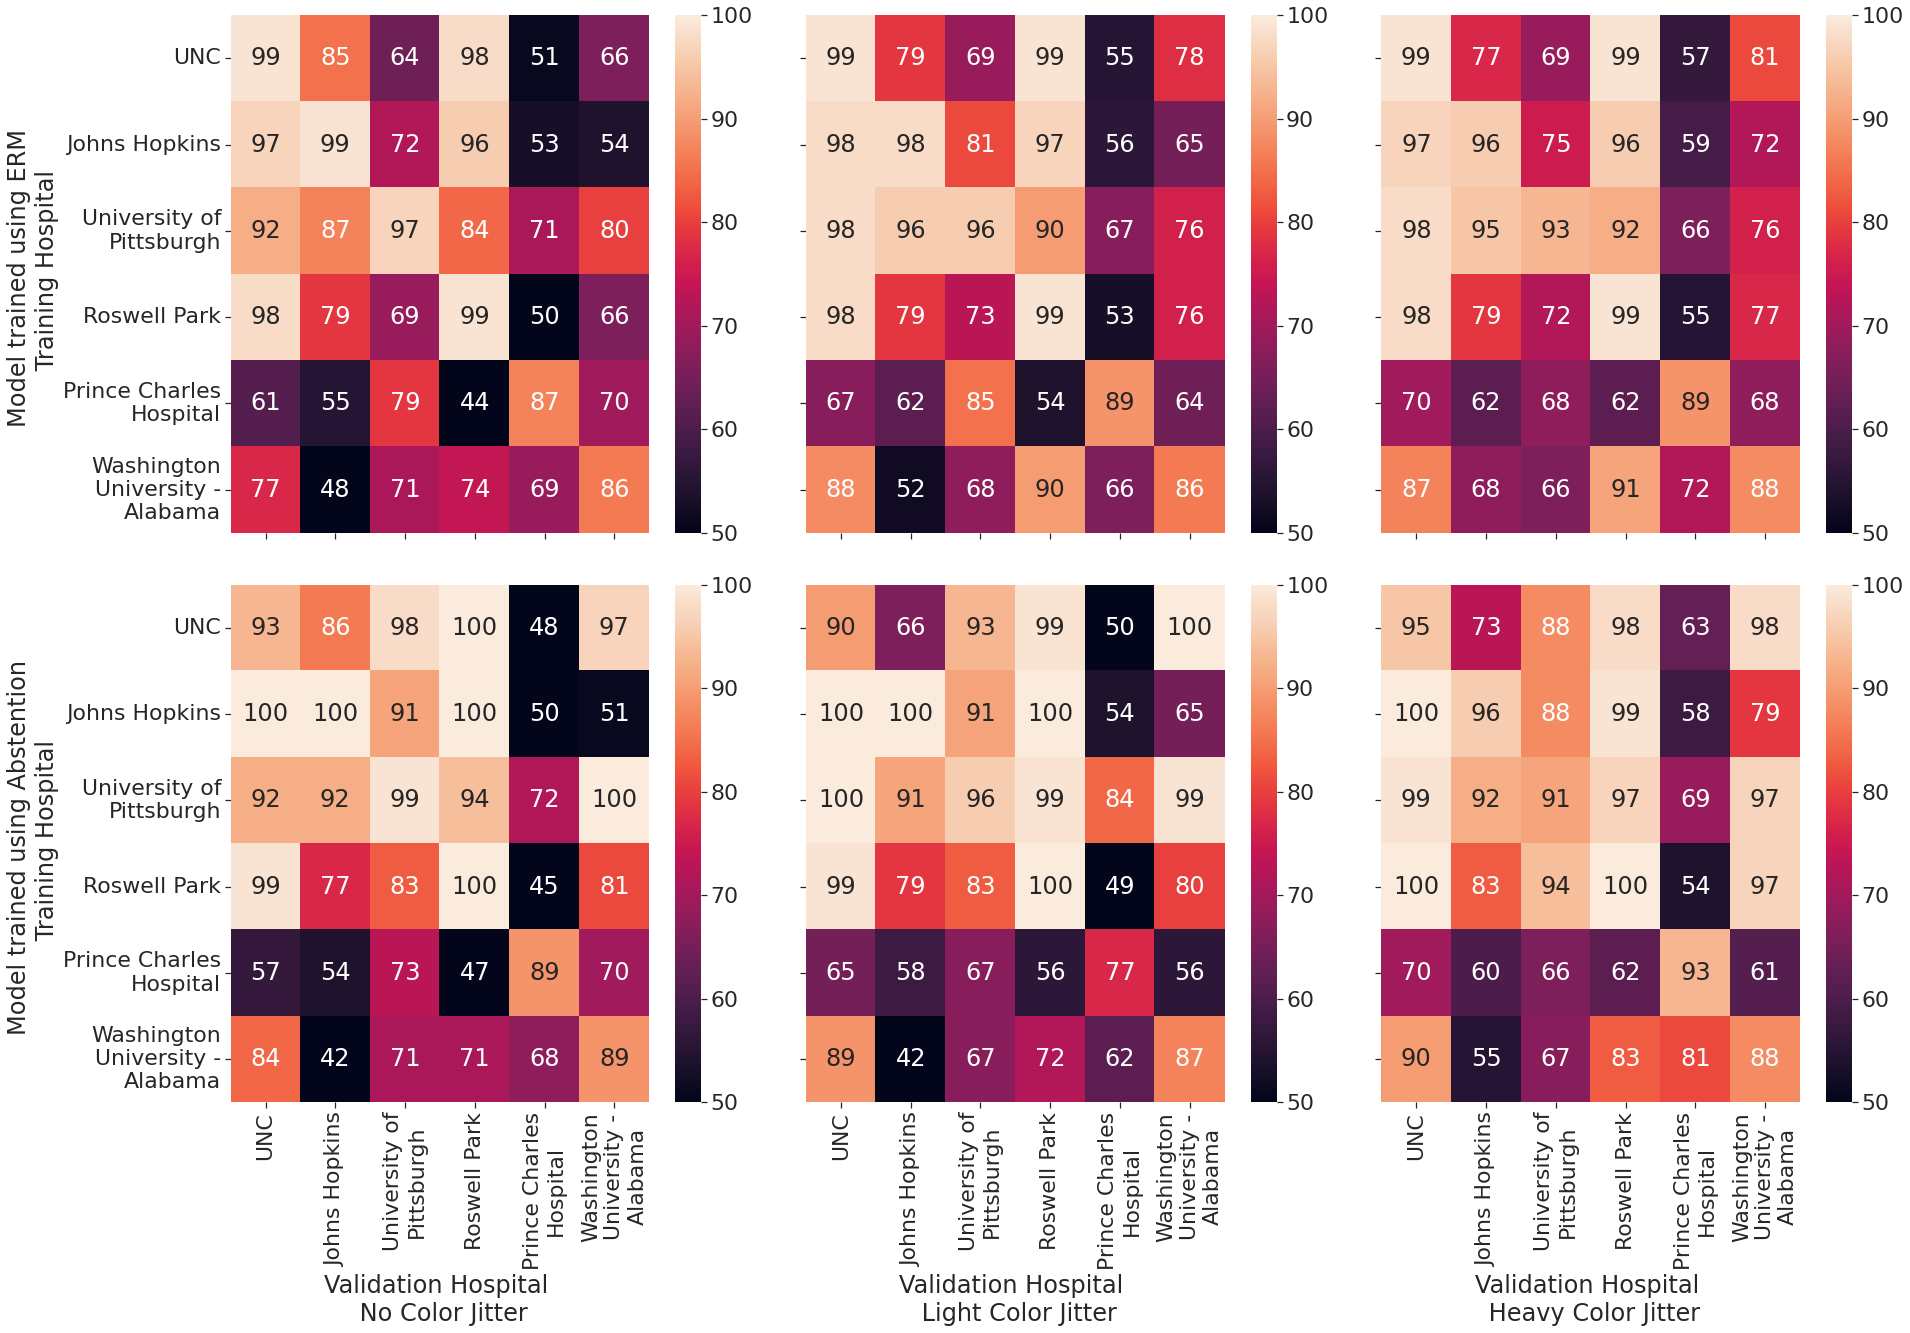

In [ ]:
sns.set(font_scale = 2, style = 'ticks')

# sps = ['x', 'slide_id', 'source_id']
confidence_tresholds = [0.5, 0.9]
ss = [0, 1, 4]

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))

data_0 =tota_macro_f1_some_hosps.loc[(0, 0.5)]
data_0_pivot = data_0.pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp')

for (i, j), (confidence_treshold, s) in zip(list(product(list(range(num_rows)), list(range(num_cols)))), list(product(confidence_tresholds, ss))):  

  print(len(tota_macro_f1_some_hosps.loc[(s, confidence_treshold)]))
  
  data = tota_macro_f1_some_hosps.loc[(s, confidence_treshold)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp').astype(int)  

  # if  (i + j) != 0:
  #   data -= data_0_pivot
  #   sns.heatmap(ax=axes[i, j], data = round(data, 2), annot=True, vmin = -10, vmax = 20, center= 0)    
  # else:
  #   sns.heatmap(ax=axes[i, j], data = round(data, 2), annot=True)    

  sns.heatmap(ax=axes[i, j], data = round(data, 2), annot=True, fmt='g', vmin = 50, vmax = 100)    

  if i == 1:
    axes[i, j].set_xticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in axes[i, j].get_xticklabels()]], rotation = 90)

    if s == 0:
      cj_strength = 'No'
    if s == 1:
      cj_strength = 'Light'
    if s == 4:
      cj_strength = 'Heavy'
    
    axes[i, j].set_xlabel(f'Validation Hospital \n {cj_strength} Color Jitter')

  else:
    axes[i, j].set_xticklabels([], rotation = 90)
    axes[i, j].set_xlabel('')
  
  if confidence_treshold == 0.5:
    model = 'ERM'
  else:
    model = 'Abstention'

  if j == 0:
    axes[i, j].set_yticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in axes[i, j].get_yticklabels()]],  rotation = 0)
    
    axes[i, j].set_ylabel(f'Model trained using {model} \n Training Hospital')
  else:
    axes[i, j].set_yticklabels([],  rotation = 0)
    axes[i, j].set_ylabel('')

  axes[i, j].set_title('')
  
  
  
plt.subplots_adjust(hspace = 0.1, wspace=0.1)

plt.savefig('/content/drive/MyDrive/DRO paper Figures notebook backup/Figures/tota_supp.png', bbox_inches='tight', dpi = 300)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app


109
109
109


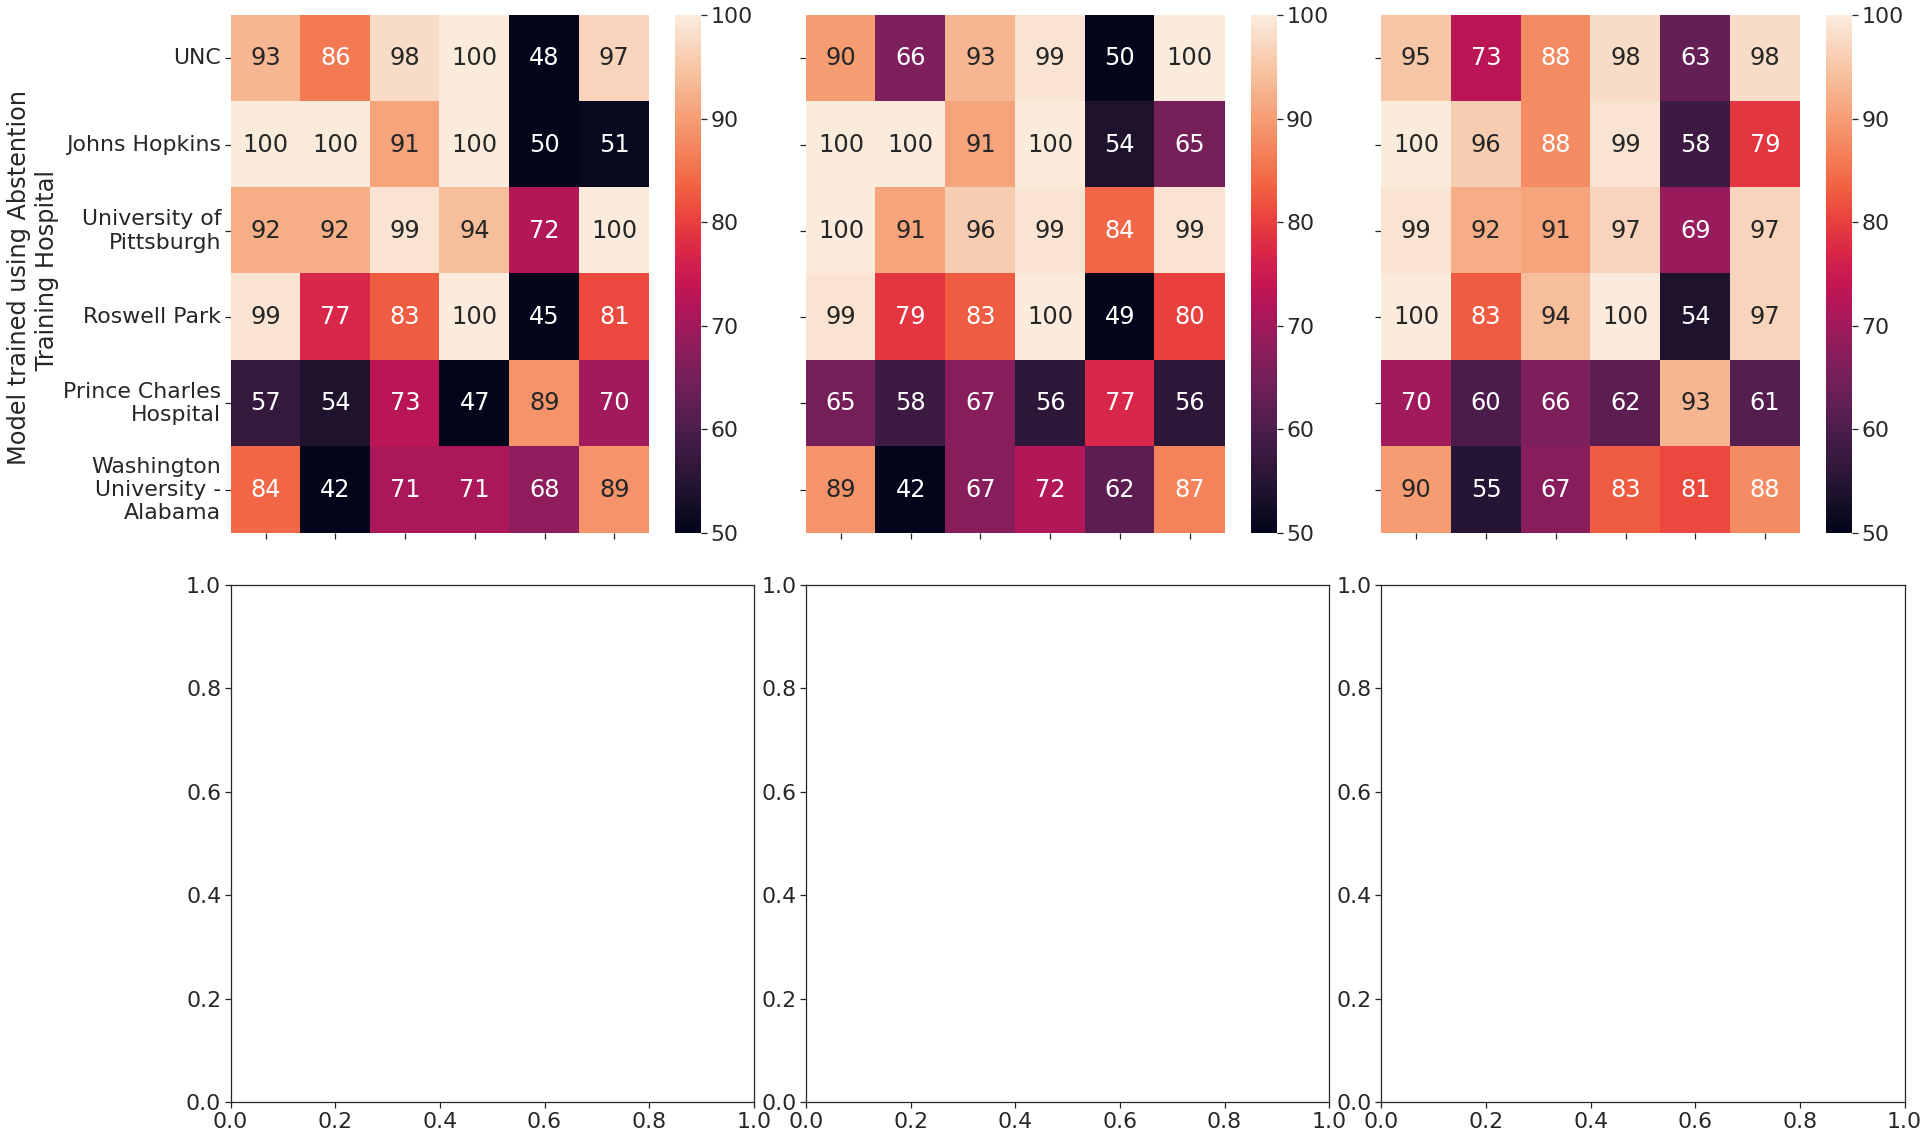

In [ ]:
sns.set(font_scale = 2, style = 'ticks')

# sps = ['x', 'slide_id', 'source_id']
confidence_tresholds = [0.9]
ss = [0, 1, 4]

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))

for (i, j), (confidence_treshold, s) in zip(list(product(list(range(num_rows)), list(range(num_cols)))), list(product(confidence_tresholds, ss))):  

  print(len(tota_macro_f1_some_hosps.loc[(s, confidence_treshold)]))
  
  data = tota_macro_f1_some_hosps.loc[(s, confidence_treshold)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp').astype(int)  

  # if  (i + j) != 0:
  #   data -= data_0_pivot
  #   sns.heatmap(ax=axes[i, j], data = round(data, 2), annot=True, vmin = -10, vmax = 20, center= 0)    
  # else:
  #   sns.heatmap(ax=axes[i, j], data = round(data, 2), annot=True)    

  sns.heatmap(ax=axes[i, j], data = round(data, 2), annot=True, fmt='g', vmin = 50, vmax = 100)    

  if i == 1:
    axes[i, j].set_xticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in axes[i, j].get_xticklabels()]], rotation = 90)

    if s == 0:
      cj_strength = 'No'
    if s == 1:
      cj_strength = 'Light'
    if s == 4:
      cj_strength = 'Heavy'
    
    axes[i, j].set_xlabel(f'Validation Hospital \n {cj_strength} Color Jitter')

  else:
    axes[i, j].set_xticklabels([], rotation = 90)
    axes[i, j].set_xlabel('')
  
  if confidence_treshold == 0.5:
    model = 'ERM'
  else:
    model = 'Abstention'

  if j == 0:
    axes[i, j].set_yticklabels([textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in axes[i, j].get_yticklabels()]],  rotation = 0)
    
    axes[i, j].set_ylabel(f'Model trained using {model} \n Training Hospital')
  else:
    axes[i, j].set_yticklabels([],  rotation = 0)
    axes[i, j].set_ylabel('')

  axes[i, j].set_title('')
  
  
  
plt.subplots_adjust(hspace = 0.1, wspace=0.1)

# plt.savefig('/content/drive/MyDrive/DRO paper Figures notebook backup/Figures/tota_supp.png', bbox_inches='tight', dpi = 300)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


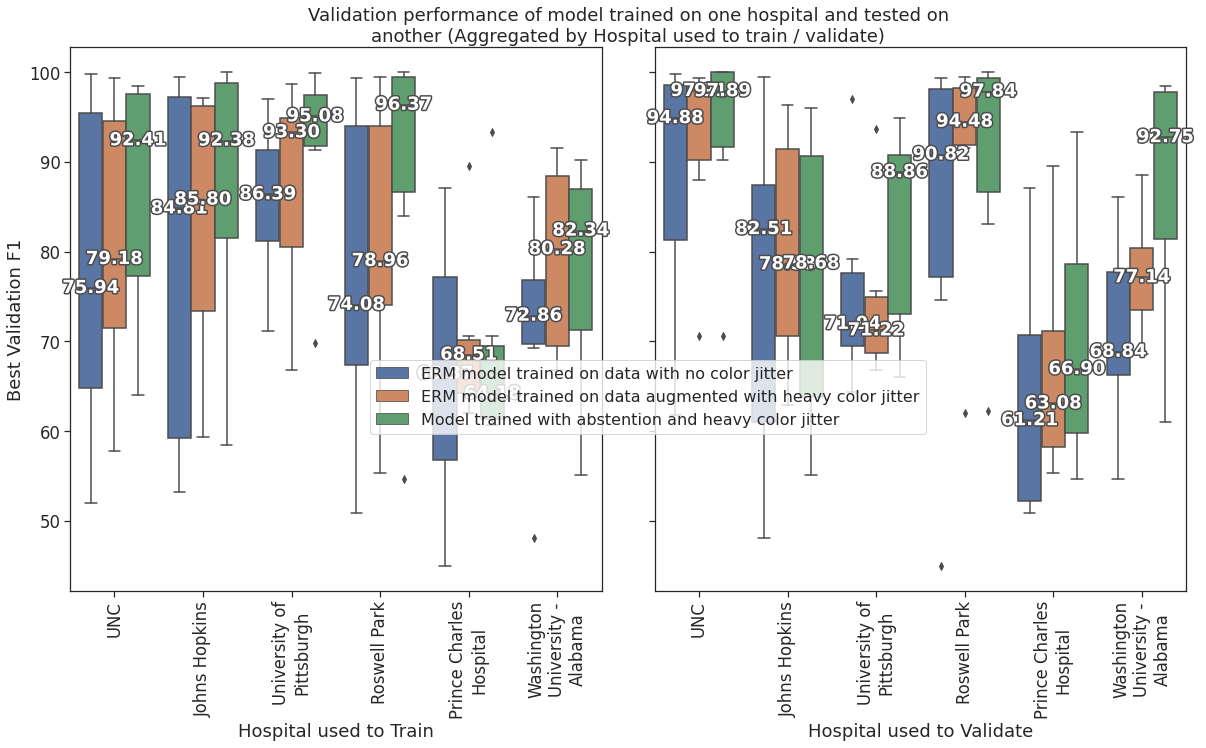

In [ ]:
sns.set(font_scale = 1.5, style = 'ticks')

data_0 = tota_macro_f1_some_hosps.loc[(0, 0.5)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp')

data_augment = tota_macro_f1_some_hosps.loc[(4, 0.5)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp')

data_abstain = tota_macro_f1_some_hosps.loc[(4, 0.9)].pivot_table(values="best_val_f1", index='training_hosp', columns='val_hosp')

'===================================================================================='

hosps = [str(i) for i in [38, 49, 50, 73, 78, 99]]
data_0_melt = pd.melt(data_0.reset_index(), id_vars=['training_hosp'], value_vars=hosps)
data_0_melt['hue'] = 'ERM model trained on data with no color jitter'

data_augment_melt = pd.melt(data_augment.reset_index(), id_vars=['training_hosp'], value_vars=hosps)
data_augment_melt['hue'] = 'ERM model trained on data augmented with heavy color jitter'

data_abstain_melt = pd.melt(data_abstain.reset_index(), id_vars=['training_hosp'], value_vars=hosps)
data_abstain_melt['hue'] = 'Model trained with abstention and heavy color jitter'

hosp_comp_data = pd.concat([data_0_melt, data_augment_melt, data_abstain_melt])

hosp_comp_data.groupby(['training_hosp', 'hue']).agg(['mean'])


'===================================================================================='

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

sns.set_style("ticks")
ax1 = sns.boxplot(ax=axes[0], data = hosp_comp_data, x = 'training_hosp', y = 'value', hue = 'hue')
ax2 = sns.boxplot(ax=axes[1], data = hosp_comp_data, x = 'val_hosp', y = 'value', hue = 'hue')
xtl = [textwrap.fill(tss[tss['TSS Code'] == i]['Source Site'].values[0], 15) for i in [t.get_text()  for t in ax1.get_xticklabels()]]

add_median_labels(ax1)
add_median_labels(ax2)

ax1.set(ylabel = "Best Validation F1", xlabel = "Hospital used to Train", xticklabels = xtl)
ax1.set_xticklabels(labels = xtl, rotation = 90)
ax2.set(ylabel = "", xlabel = "Hospital used to Validate", xticklabels = xtl)
ax2.set_xticklabels(labels = xtl, rotation = 90)
ax2.set_yticklabels(labels = [])

# add_median_labels(ax1)
# add_median_labels(ax2)

for ax in axes:
    # for ax in ax1:
        ax.legend([],[], frameon=False)

plt.subplots_adjust(wspace = 0.1, hspace = 0)
plt.title(textwrap.fill('Validation performance of model trained on one hospital and tested on another (Aggregated by Hospital used to train / validate)', 75))
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',  prop={'size': 16}, bbox_to_anchor=(0.45, .55))

plt.savefig('/content/drive/MyDrive/DRO paper Figures notebook backup/Figures/train_one_test_another_train_dist_main.png', bbox_inches='tight', dpi = 300)
plt.show()


# PRAD

## max dro tf

In [ ]:
# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/Lung-PRAD/cbk53rpo")
sweep_runs = sweep.runs

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)
    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    })



100%|██████████| 25/25 [00:00<00:00, 87.88it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS']).agg(['median', 'std'])[['test_task_f1']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS test_task_f1          
                           median       std
0                  1    76.277137  2.922335
1                  2    79.056907  7.624730
2                  3    69.259882  7.090592
3                  4    72.090453  8.827425
4                  5    71.107095  7.523268

## max dro no tf

In [ ]:
# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/Lung-PRAD/zgjkwzw0")
sweep_runs = sweep.runs

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)
    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    })



100%|██████████| 25/25 [00:00<00:00, 106.16it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS']).agg(['median', 'std'])[['test_task_f1']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS test_task_f1           
                           median        std
0                  1    62.991410  16.400681
1                  2    64.758432   5.127368
2                  3    62.995774   7.138976
3                  4    59.153509   4.989101
4                  5    64.713717   5.816313

## ABSTENTION - NO TF

In [ ]:


# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/Lung-PRAD/hvabgnw3")
sweep_runs = sweep.runs

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)
    coverages.append(run.summary._json_dict['test_num_confident'] * 100/31.080292) 

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])
    confidences.append(run.config['confidence_threshold'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "test_num_confident": coverages,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    "confidence_threshold": confidences
    })



100%|██████████| 125/125 [00:01<00:00, 84.61it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS', 'confidence_threshold']).agg(['median', 'std'])[['test_task_f1', 'test_num_confident']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS confidence_threshold  ... test_num_confident           
                                            ...             median        std
0                   1                  0.5  ...          99.999999   1.514911
1                   1                  0.6  ...          83.467775   3.148109
2                   1                  0.7  ...          63.503993   8.194149
3                   1                  0.8  ...          50.284507  24.173748
4                   1                  0.9  ...          37.439687  30.380480
5                   2                  0.5  ...         100.675770   2.561893
6                   2                  0.6  ...          84.839684   4.487428
7                   2                  0.7  ...          70.562510   4.014461
8                   2                  0.8  ...          43.294318   7.475566
9                   2                  0.9  ...          22.393612  10.356382
10                  3                  0.5  ...         102.199100   1.198329
11                  3                  0.6  ...          86.669887   5.396404
12                  3                  0.7  ...          62.141393   5.903080
13                  3                  0.8  ...          51.226224   9.914103
14                  3                  0.9  ...          21.512908  10.110275
15                  4                  0.5  ...         102.049312   0.920097
16                  4                  0.6  ...          87.524590   2.378271
17                  4                  0.7  ...          65.561842   8.614572
18                  4                  0.8  ...          50.552935   7.337594
19                  4                  0.9  ...          31.607775   6.473613
20                  5                  0.5  ...         101.870147   0.676966
21                  5                  0.6  ...          86.499903   5.365706
22                  5                  0.7  ...          65.398854   7.578330
23                  5                  0.8  ...          47.767100   8.730932
24                  5                  0.9  ...          28.643357   8.296310

[25 rows x 6 columns]

## ABSTENTION - TF

In [ ]:


# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/Lung-PRAD/gd67381j")
sweep_runs = sweep.runs

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)
    coverages.append(run.summary._json_dict['test_num_confident'] * 100/31.677420) #

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])
    confidences.append(run.config['confidence_threshold'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "test_num_confident": coverages,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    "confidence_threshold": confidences
    })



100%|██████████| 125/125 [00:01<00:00, 74.47it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS', 'confidence_threshold']).agg(['median', 'std'])[['test_task_f1', 'test_num_confident']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS confidence_threshold  ... test_num_confident           
                                            ...             median        std
0                   1                  0.5  ...          99.999999   2.460968
1                   1                  0.6  ...          88.391037   4.205907
2                   1                  0.7  ...          80.620397   2.566103
3                   1                  0.8  ...          69.450100   5.052215
4                   1                  0.9  ...          52.451825   8.482218
5                   2                  0.5  ...          99.689138   1.805804
6                   2                  0.6  ...          89.505211   3.435277
7                   2                  0.7  ...          81.391123   7.636649
8                   2                  0.8  ...          70.410873   8.890165
9                   2                  0.9  ...          46.342159  16.768893
10                  3                  0.5  ...          99.669991   1.041489
11                  3                  0.6  ...          91.986604   1.419955
12                  3                  0.7  ...          80.663888   4.047839
13                  3                  0.8  ...          70.263385   4.358862
14                  3                  0.9  ...          55.596419   9.545277
15                  4                  0.5  ...         100.147481   0.653246
16                  4                  0.6  ...          90.180731   3.446282
17                  4                  0.7  ...          77.396583   5.108384
18                  4                  0.8  ...          65.712711   6.867108
19                  4                  0.9  ...          51.027447  14.272150
20                  5                  0.5  ...         100.287275   0.194066
21                  5                  0.6  ...          89.432463   1.216297
22                  5                  0.7  ...          74.722320   9.818601
23                  5                  0.8  ...          55.786044   7.871239
24                  5                  0.9  ...          38.988924   7.178924

[25 rows x 6 columns]

In [ ]:
# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/uncategorized/1282hqp7")
sweep_runs = sweep.runs

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    test_task_f1s.append(run.summary._json_dict['test_task_f1'] * 100)
    coverages.append(run.summary._json_dict['test_num_confident'] * 100/31.677420) #

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])
    confidences.append(run.config['confidence_threshold'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "test_num_confident": coverages,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    "confidence_threshold": confidences
    })




100%|██████████| 100/100 [00:01<00:00, 50.55it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS', 'confidence_threshold']).agg(['median', 'std'])[['test_task_f1', 'test_num_confident']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS confidence_threshold  ... test_num_confident           
                                            ...             median        std
0                   1                  0.6  ...          88.769858   3.568877
1                   1                  0.7  ...          82.320225   3.083730
2                   1                  0.8  ...          70.283279   6.749995
3                   1                  0.9  ...          53.054989  11.482544
4                   2                  0.6  ...          90.495583   2.773284
5                   2                  0.7  ...          83.587174   7.206525
6                   2                  0.8  ...          72.808957  10.792297
7                   2                  0.9  ...          55.231772  18.447511
8                   3                  0.6  ...          92.249373   1.227599
9                   3                  0.7  ...          79.910020   5.803090
10                  3                  0.8  ...          69.728326   5.959495
11                  3                  0.9  ...          55.485172  10.751962
12                  4                  0.6  ...          89.783021   3.512146
13                  4                  0.7  ...          76.519311   4.221782
14                  4                  0.8  ...          64.950721   6.980892
15                  4                  0.9  ...          52.069434   8.902230
16                  5                  0.6  ...          89.966125   1.338200
17                  5                  0.7  ...          74.071426   8.416671
18                  5                  0.8  ...          56.244615   8.411879
19                  5                  0.9  ...          39.213793   6.428727

[20 rows x 6 columns]

# KIRC

## Abstention

In [ ]:
# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/kirc/jp6w1160")
sweep_runs = sweep.runs

test_task_f1s, coverages, hold_out_hosps, confidences, filter_tumor, name_list = [], [], [], [], [], []

for run in tqdm(sweep_runs): 

    test_task_f1s.append(run.summary._json_dict['best_val_f1'] * 100)
    coverages.append(run.summary._json_dict['val_num_confident'] / 125.503998 * 100)
    hold_out_hosps.append(run.config['NUM_HOLD_OUT_HOSPS'])
    filter_tumor.append(run.config['filter_tumor'])
    confidences.append(run.config['confidence_threshold'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "coverage": coverages,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    "filter_tumor": filter_tumor,
    "confidence_threshold": confidences,
    })



100%|██████████| 50/50 [00:00<00:00, 54.87it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS', 'confidence_threshold', 'filter_tumor']).agg(['median', 'std'])[['coverage', 'test_task_f1']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS confidence_threshold filter_tumor    coverage             \
                                                            median        std   
0                  0                  0.5        False  100.000000   0.586544   
1                  0                  0.5         True  100.000000   0.586544   
2                  0                  0.6        False   65.432181  19.760343   
3                  0                  0.6         True   78.773585  12.982891   
4                  0                  0.7        False   37.283274  17.338435   
5                  0                  0.7         True   30.360786  11.656146   
6                  0                  0.8        False   20.423254   5.317164   
7                  0                  0.8         True   22.048701   3.314677   
8                  0                  0.9        False    8.069863  10.303942   
9                  0                  0.9         True    6.030087   7.744540   

  test_task_f1             
        median        std  
0    64.424288   6.954196  
1    68.053961   3.983521  
2    68.622762   8.834932  
3    69.664234  10.494302  
4    71.231461  14.568153  
5    72.277462  10.916362  
6    83.806431  12.831151  
7    86.555392  12.373626  
8    76.086313  15.069537  
9    73.159087  16.035200

[Text(0, 0.5, 'F1'),
 [Text(0, 0, 'Normal'), Text(0, 0, 'Abstention')],
 Text(0.5, 0, 'Model used')]

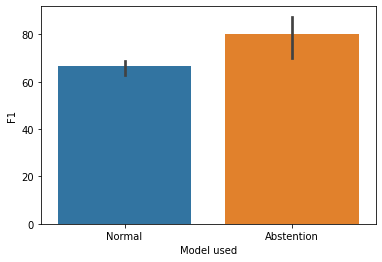

In [ ]:
ax = sns.barplot(data = runs_df[(runs_df['confidence_threshold'].isin([0.5, 0.8])) & (runs_df['filter_tumor'].isin(['True'])) ], y = 'test_task_f1', x = 'confidence_threshold')
ax.set(xticklabels = ['Normal', 'Abstention'], xlabel = 'Model used', ylabel= 'F1', )

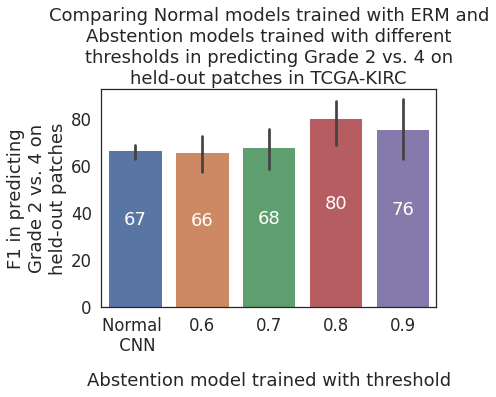

In [ ]:
sns.set(font_scale = 1.5, style = 'white')

fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = runs_df[(runs_df['filter_tumor'].isin(['True'])) ], y = 'test_task_f1', x = 'confidence_threshold')
ax.set(xticklabels = ['Normal \n CNN', '0.6', '0.7', '0.8', '0.9'], 
        xlabel = textwrap.fill('Abstention model trained with threshold', 50), ylabel= textwrap.fill('F1 in predicting Grade 2 vs. 4 on held-out patches', 20), 
       title = textwrap.fill('Comparing Normal models trained with ERM and Abstention models trained with different thresholds in predicting Grade 2 vs. 4 on held-out patches in TCGA-KIRC', 45))
ax.set_xlabel(textwrap.fill('Abstention model trained with threshold', 50), labelpad=17)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() / 2 - 0.05 ), 
                   ha = 'center', va = 'center', c = 'w', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Group-DRO

In [ ]:


# Project is specified by <entity/project-name>
sweep = api.sweep("surya-narayanan/kirc/djxwh9ic")
sweep_runs = sweep.runs

summary_list, config_list, name_list = [], [], []

test_task_f1s, coverages, hold_out_hosps, confidences = [], [], [], []

for run in tqdm(sweep_runs): 
    
    if len(run.summary._json_dict) == 0:
      continue

    test_task_f1s.append(run.summary._json_dict['val_task_f1'] * 100)
    hold_out_hosps.append(run.config['filter_tumor'])

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "test_task_f1": test_task_f1s,
    "NUM_HOLD_OUT_HOSPS": hold_out_hosps,
    })




100%|██████████| 10/10 [00:00<00:00, 15437.26it/s]


In [ ]:
runs_df.groupby(['NUM_HOLD_OUT_HOSPS']).agg(['median', 'std'])[['test_task_f1']].reset_index()#.to_latex(index=False)

NUM_HOLD_OUT_HOSPS test_task_f1          
                           median       std
0              False    62.088364  9.122018
1               True    65.058738  5.148171